In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [27]:
spam= pd.read_csv('spam.csv' , encoding='latin-1')

In [28]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [29]:
spam=spam.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
spam=spam.rename(columns={"v1":"label","v2":"text"})
spam.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
spam.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [31]:
len(spam)

5572

In [32]:
spam.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [33]:
spam['length']=spam['text'].apply(len)
spam.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

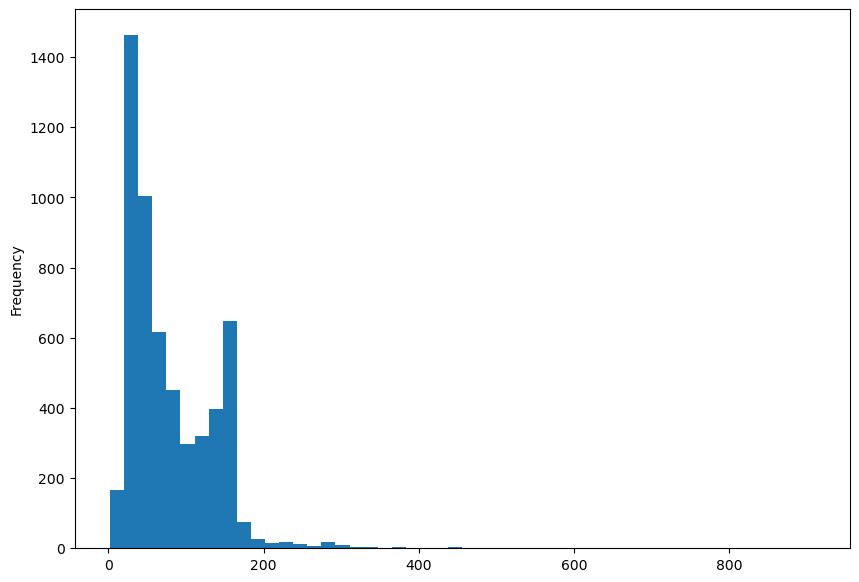

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

spam['length'].plot(bins=50, kind='hist',figsize=(10,7))

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

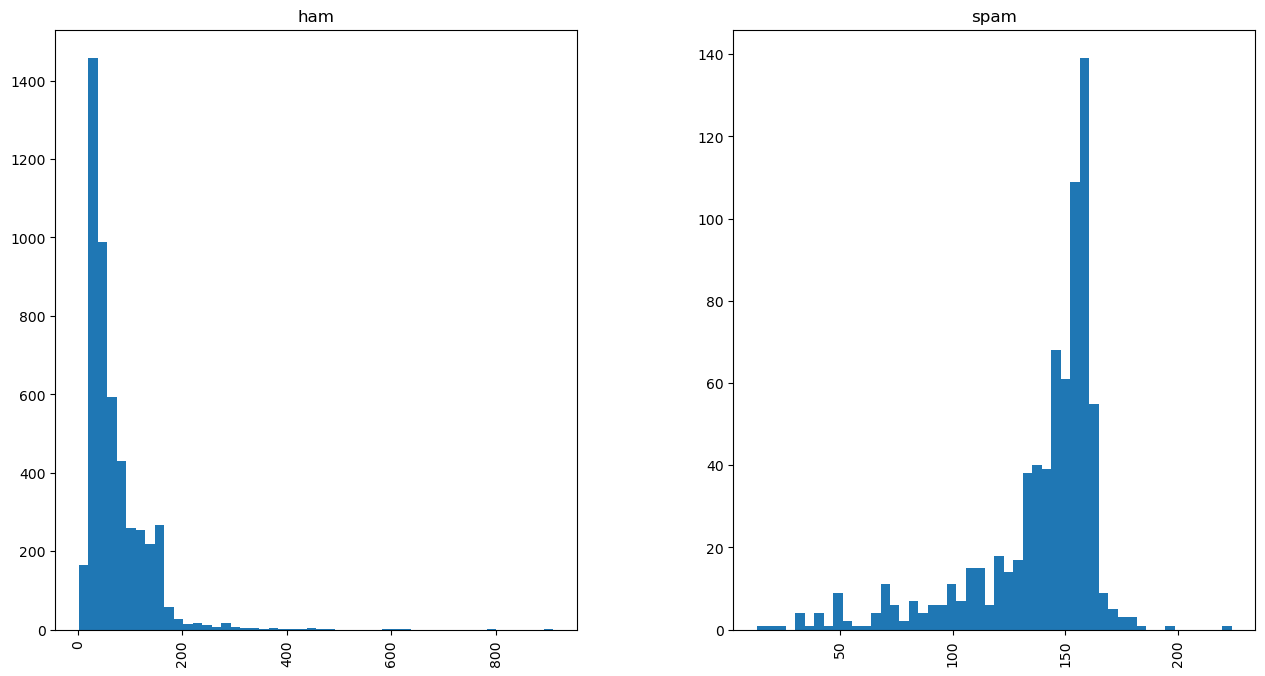

In [36]:
spam.hist(column='length', by='label', bins=50, figsize=(15,8))

In [37]:
spam.loc[:,'label']=spam.label.map({'ham':0, 'spam':1})
spam.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count=CountVectorizer()
input=['REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode']

text=count.fit_transform(spam['text'])

x_train, x_test, y_train, y_test= train_test_split(text, spam['label'], test_size=0.20, random_state=1)
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [39]:
print(x_train.shape)
print(x_test.shape)

input=text[5571]

(4457, 8672)
(1115, 8672)


In [40]:
import nltk
from sklearn.neural_network import MLPClassifier
model=MLPClassifier()
model.fit(x_train, y_train)

MLPClassifier()

In [18]:
prediction=model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,ConfusionMatrixDisplay

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Multinomial NB
Accuracy score: 0.9919282511210762
Precision score: 1.0
Recall score: 0.935251798561151
F1 score: 0.966542750929368


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [21]:
conf=confusion_matrix(prediction,y_test)

In [22]:
conf

array([[976,   9],
       [  0, 130]], dtype=int64)

In [23]:
display=ConfusionMatrixDisplay(confusion_matrix=conf,display_labels=model.classes_)

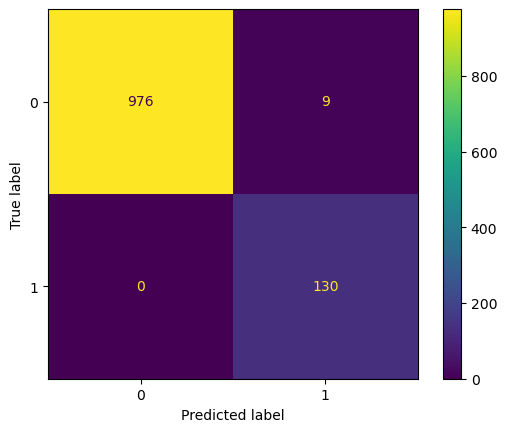

In [24]:
display.plot()

[]

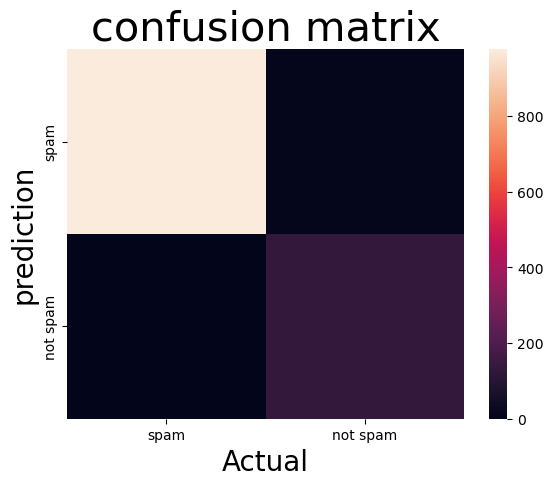

In [25]:
sns.heatmap(conf,xticklabels=['spam','not spam'],yticklabels=['spam','not spam'])
plt.title("confusion matrix",fontsize=30)
plt.xlabel("Actual",fontsize=20)
plt.ylabel("prediction",fontsize=20)
plt.plot()